# Homework 3 #
## Robin James rnj13 ##
### Initialization ###

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

rng = np.random.default_rng()

In [2]:
def richardson_center(f, z, h, nsteps, args=()):
    """Evaluate the first derivative of a function at z, that is f'(z),
    using Richardson extrapolation and center differencing.

    Returned is the full table of approximations, Fij for j <= i. The
    values of Fij for j > i are set to zero.  The final value F[-1,-1]
    should be the most accurate estimate.

    Parameters
    ----------
    f : function
        Vectorized Python function.
        This is the function for which we are estimating the derivative.
    z : number
        Value at which to evaluate the derivative.
    h : number
        Initial stepsize.
    nsteps : integer
        Number of steps to perform.
    args : tuple, optional
        extra arguments to pass to the function, f.
    """
    # Extra check to allow for args=(1) to be handled properly.  This is a
    # technical detail that you do not need to worry about.
    if not isinstance(args, (tuple, list, np.ndarray)):
        args = (args,)
    # Create a zero filled table for our estimates
    F = np.zeros((nsteps, nsteps))
    # First column of F is the center differencing estimate.  We can fill this
    # without a loop!
    harr = h / 2.**np.arange(nsteps)
    F[:,0] = (f(z+harr, *args) - f(z-harr, *args)) / (2.*harr)
    # Now iterate, unfortunately we do need one loop.  We could
    # get rid of the inner loop but the algorithm is a little easier to
    # understand if we do not.
    for i in range(1, nsteps):
        fact = 0.25
        for j in range(1, i+1):
            F[i,j] = F[i-1,j-1] - (F[i-1,j-1] - F[i,j-1]) / (1-fact)
            fact *= 0.25
    return F

## Question 1 ##
### Part i ###

In [4]:
def f(x):
    """f(x)=e^(-x/3)"""
    return np.exp(-x/3)

In [36]:
x=0.7
h10=np.array([0.1,0.01,10e-4,10e-5,10e-6,10e-7,10e-8])

h = h10 + x


N = 7
F = richardson_center(f, x, h, N)
print("Calaculated value for f'(x) using centering diffrencing with h equal to 0.1,0.01,10e-4,10e-5,10e-6,10e-7:",F[:][:-1][-1])

Calaculated value for f'(x) using centering diffrencing with h equal to 0.1,0.01,10e-4,10e-5,10e-6,10e-7: [-0.26396553 -0.26396319 -0.26396319 -0.26396319 -0.26396319 -0.26396319
  0.        ]


The true value of f'(x) is found by the following:
$$ \frac{d}{dx} f'(x)=\frac{d}{dx}e^{-\frac{x}{3}}=$$
$$-\frac{1}{3}e^{-\frac{x}{3}} $$
Evaluated for x= 0.7
$$-\frac{1}{3}e^{-\frac{0.7}{3}}= -\frac{1}{3}e^{-\frac{7}{30}}= -0.26396318877892 $$

Fractional Errors: [8.86144936e-06 3.98039546e-10 4.86259907e-10 1.84774866e-10
 1.57028668e-10 1.50979002e-10 1.00000000e+00]


Text(0.5, 0, 'h')

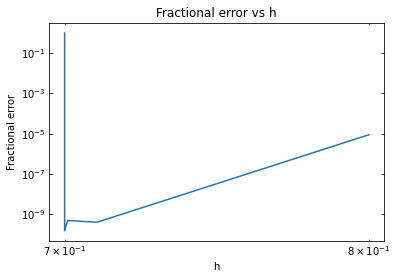

In [41]:
r=-0.26396318877892
frac_error= np.abs((F[:][:-1][-1]-r)/r)
print("Fractional Errors:",frac_error)
fig= plt.figure()
##fig.yscale("log")
ax = fig.add_subplot(111)

ax.loglog(h,frac_error)
ax.set_title("Fractional error vs h")
ax.set_ylabel("Fractional error")
ax.set_xlabel("h")

### Part ii ###
Minimize h for $$ e(h)= \frac{\epsilon}{h}+ \frac{h^2}{6}M $$
$$\frac{d}{dh} \frac{\epsilon}{h}+ \frac{h^2}{6}M = -\frac{\epsilon}{h^2}+ \frac{h}{3}M=0 $$
Solving for h
$$ h= ({\frac{3\epsilon}{M}})^{\frac{1}{3}} $$

### Part iii ###
$$ f'''(x)=\frac{-e^{\frac{-x}{3}}}{27} $$
Evaluated for x= 0.7, f'''(x)= -0.029329
Max value for f'''(x) is at x== and is $$\frac{-1}{27} $$

## Problem 2 ##
